In [1]:
import os
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import clip
from collections import OrderedDict
import torch
import skimage
import cv2

/home/arty/anaconda3/envs/clip/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = 'cuda'
model, preprocess = clip.load("ViT-B/32")

In [3]:
microwave = './examples/micro.mp4'
kettle = './examples/kettle.mp4'
light = './examples/light_switch.mp4'
slide_cabinet = './examples/slide_cabinet.mp4'
hinge_cabinet = './examples/hinge_cabinet.mp4'
bottom_burner = './examples/bottom_burner.mp4'
top_burner = './examples/top_burner.mp4'
block = './examples/block.mp4'
carla1 = './examples/carla1.mp4'
carla2 = './examples/carla2.mp4'

In [4]:
def get_frames(task):
    frames = []
    video_cv2 = cv2.VideoCapture(task)
    current_frame = 0
    while video_cv2.isOpened():
        ret, frame = video_cv2.read()
        if ret == True:
            frames.append(Image.fromarray(frame[:, :, ::-1]))
        else:
            break
        current_frame += 1
        video_cv2.set(cv2.CAP_PROP_POS_FRAMES, current_frame)

    print(f"Frames extracted: {len(frames)}")

    image_input = torch.stack([preprocess(frame) for frame in frames]).to(device)

    with torch.no_grad():
        image_features = model.encode_image(image_input).float()

    similarity = []
    image_features /= image_features.norm(dim=-1, keepdim=True)
    similarity = np.dot(image_features.cpu().numpy(), image_features.cpu().numpy().T)

    count = len(image_features)
    plt.figure(figsize=(20, 14))
    plt.imshow(similarity)
    plt.colorbar()
    
    for side in ["left", "top", "right", "bottom"]:
        plt.gca().spines[side].set_visible(True)

    plt.xlim([-0.5, count - 0.5])
    plt.ylim([count + 0.5, -2])


Frames extracted: 1085


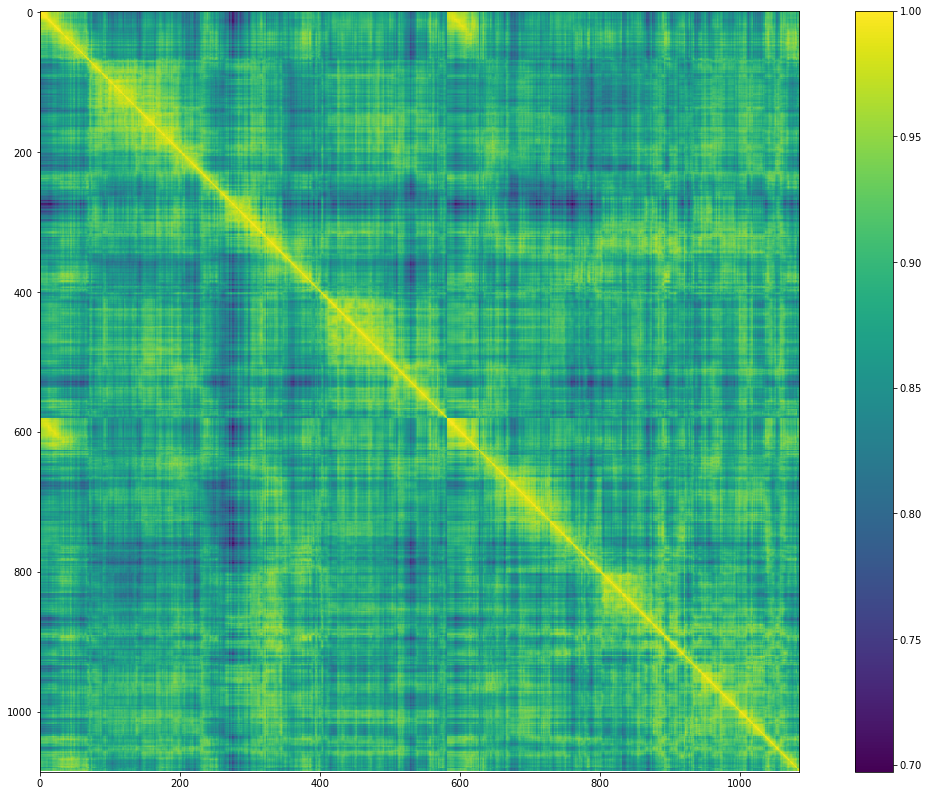

: 

In [5]:
get_frames(carla1)